In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, _data
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

path = 'penguin_dataset.csv'
df = pd.read_csv(path)
df = df.drop(['individual_id','date_egg','sex', 'clutch_completion'],axis=1)
# print(df)

le = LabelEncoder()

df['island'] = le.fit_transform(df['island'])
df['species'] = le.fit_transform(df['species'])

# print(df)
df = df.dropna(axis=0)
print(df)

train_x, test_x, train_y, test_y = train_test_split(df.drop(['species'],axis=1),df['species'],random_state=42,train_size=0.8,test_size=0.2,shuffle=True)

scaler = StandardScaler()

scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
1         2              39.5             17.4              186.0   
2         2              40.3             18.0              195.0   
4         2              36.7             19.3              193.0   
5         2              39.3             20.6              190.0   
6         2              38.9             17.8              181.0   
..      ...               ...              ...                ...   
339       1              55.8             19.8              207.0   
340       1              43.5             18.1              202.0   
341       1              49.6             18.2              193.0   
342       1              50.8             19.0              210.0   
343       1              50.2             18.7              198.0   

     body_mass_g  delta_15_N  delta_13_C  species  
1         3800.0     8.94956   -24.69454        0  
2         3250.0     8.36821   -25.33302        0  
4         3450.

[Text(0.5416666666666666, 0.9285714285714286, 'X[3] <= 0.419\ngini = 0.636\nsamples = 264\nvalue = [112, 51, 101]'),
 Text(0.3333333333333333, 0.7857142857142857, 'X[6] <= 0.887\ngini = 0.429\nsamples = 160\nvalue = [111, 48, 1]'),
 Text(0.16666666666666666, 0.6428571428571429, 'X[1] <= 0.561\ngini = 0.019\nsamples = 104\nvalue = [103, 0, 1]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 103\nvalue = [103, 0, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.6428571428571429, 'X[1] <= -0.697\ngini = 0.245\nsamples = 56\nvalue = [8, 48, 0]'),
 Text(0.4166666666666667, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.5833333333333334, 0.5, 'X[0] <= 1.251\ngini = 0.077\nsamples = 50\nvalue = [2, 48, 0]'),
 Text(0.5, 0.35714285714285715, 'X[4] <= 0.06\ngini = 0.04\nsamples = 49\nvalue = [1, 48, 0]'),
 Text(0.4166666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]'),
 Text(0.5833333333333334, 0.2142857142857

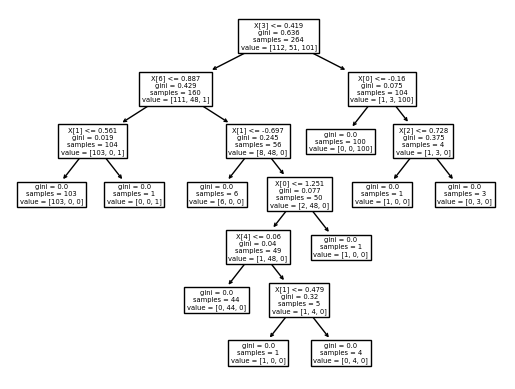

In [2]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(train_x, train_y)
plot_tree(decision_tree)


In [3]:
results_dict = {'Accuracy':0,'Precision':0,'Recall':0}

results_dict['Accuracy'] = accuracy_score(test_y, decision_tree.predict(test_x))
results_dict['Precision'] = precision_score(test_y, decision_tree.predict(test_x),average='micro')
results_dict['Recall'] = recall_score(test_y, decision_tree.predict(test_x), average='micro')

print(results_dict)

results_dict1 = {'Accuracy1':0,'Precision1':0,'Recall1':0}

results_dict1['Accuracy1'] = accuracy_score(test_y, decision_tree.predict(test_x))
results_dict1['Precision1'] = precision_score(test_y, decision_tree.predict(test_x),average='macro')
results_dict1['Recall1'] = recall_score(test_y, decision_tree.predict(test_x), average='macro')

print(results_dict1)

results_dict2 = {'Accuracy2':0,'Precision2':0,'Recall2':0}

results_dict2['Accuracy2'] = accuracy_score(test_y, decision_tree.predict(test_x))
results_dict2['Precision2'] = precision_score(test_y, decision_tree.predict(test_x),average='weighted')
results_dict2['Recall2'] = recall_score(test_y, decision_tree.predict(test_x), average='weighted')

print(results_dict2)

{'Accuracy': 0.9545454545454546, 'Precision': 0.9545454545454546, 'Recall': 0.9545454545454546}
{'Accuracy1': 0.9545454545454546, 'Precision1': 0.9517993979200877, 'Recall1': 0.9517993979200877}
{'Accuracy2': 0.9545454545454546, 'Precision2': 0.9545454545454546, 'Recall2': 0.9545454545454546}


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# load plot helper code


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots()

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt


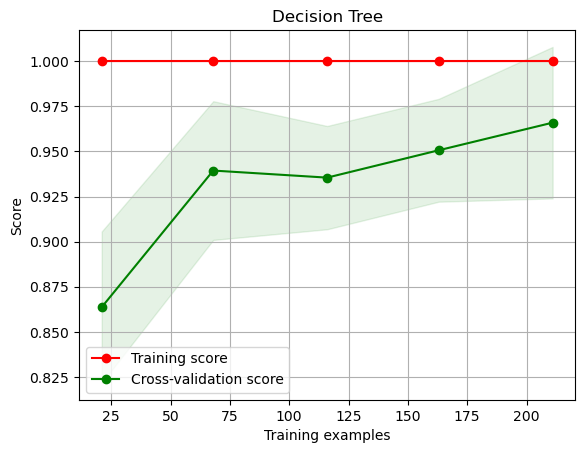

In [5]:
decision_tree = DecisionTreeClassifier(random_state=42)
plot_learning_curve(decision_tree, "Decision Tree", train_x, train_y)
plt.show()